In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras import models, layers, optimizers, losses
from sklearn.model_selection import train_test_split

import os
files = []
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        # print(os.path.join(dirname, filename))
        files.append(os.path.join(dirname, filename))

train_dataset = pd.read_csv(files[0])
test_dataset = pd.read_csv(files[1])
train_labels = train_dataset['Survived']
train_dataset = train_dataset.drop('Survived', axis=1)
test_dataset.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# DATA-PREPROCESSING

In [2]:
# Deleting irrelevant columns
train_dataset = train_dataset.drop("PassengerId", axis=1)
train_dataset = train_dataset.drop('Name', axis=1) 
train_dataset = train_dataset.drop('Ticket', axis=1)

passengerIDs = test_dataset['PassengerId']
test_dataset = test_dataset.drop("PassengerId", axis=1)
test_dataset = test_dataset.drop('Name', axis=1)
test_dataset = test_dataset.drop('Ticket', axis=1)
train_dataset.head()

# optimized version =========================================================
# columns_to_drop = ["PassengerId", "Name", "Ticket"]
# train_dataset = train_dataset.drop(columns=columns_to_drop, axis=1)
# test_dataset = test_dataset.drop(columns=columns_to_drop, axis=1)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


In [3]:
# NORMALISATIONS

# Normalising Age
train_dataset['Age'] -= train_dataset['Age'].mean(axis=0)
train_dataset['Age'] /= train_dataset['Age'].std(axis=0)
test_dataset['Age'] -= test_dataset['Age'].mean(axis=0)
test_dataset['Age'] /= test_dataset['Age'].std(axis=0)

# Normalising SibSp
train_dataset['SibSp'] -= train_dataset['SibSp'].mean(axis=0)
train_dataset['SibSp'] /= train_dataset['SibSp'].std(axis=0)
test_dataset['SibSp'] -= test_dataset['SibSp'].mean(axis=0)
test_dataset['SibSp'] /= test_dataset['SibSp'].std(axis=0)

# Normalising Parch
train_dataset['Parch'] -= train_dataset['Parch'].mean(axis=0)
train_dataset['Parch'] /= train_dataset['Parch'].std(axis=0)
test_dataset['Parch'] -= test_dataset['Parch'].mean(axis=0)
test_dataset['Parch'] /= test_dataset['Parch'].std(axis=0)

# Normalising Fare
train_dataset['Fare'] -= train_dataset['Fare'].mean(axis=0)
train_dataset['Fare'] /= train_dataset['Fare'].std(axis=0)
test_dataset['Fare'] -= test_dataset['Fare'].mean(axis=0)
test_dataset['Fare'] /= test_dataset['Fare'].std(axis=0)

# optimized version =========================================================
# def normalizeColumns(dataset, column_name):
#     mean = train_dataset[column].mean(axis=1)
#     std = train_dataset[column].std(axis=1)
#     dataset[column_name] = (dataset[column_name] - mean) / std
        
# columns = ['Age', 'SibSp', 'Parch', 'Fare']
# for column in columns:
#     normalizeColumns(train_dataset, column)
#     normalizeColumns(test_dataset, column)

In [4]:
# CONVERTING SEX TO INT
train_dataset['Sex'] = train_dataset['Sex'].replace({"male": 1, "female": 0})
test_dataset['Sex'] = test_dataset['Sex'].replace({"male": 1, "female": 0})

# optimized version =========================================================
# mapping = {"male": 1, "female": 0}
# train_dataset["Sex"] = train_dataset['Sex'].map(mapping)
# test_dataset['Sex'] = test_dataset['Sex'].map(mapping)

In [5]:
# SPLITTING CABIN INTO HAS_CABIN
train_dataset['HasCabin'] = train_dataset['Cabin'].notna().astype(int)
train_dataset = train_dataset.drop('Cabin', axis=1)
test_dataset['HasCabin'] = test_dataset['Cabin'].notna().astype(int)
test_dataset = test_dataset.drop('Cabin', axis=1)

In [6]:
# ONE-HOT ENCODING ON PCLASS

train_dataset = pd.get_dummies(train_dataset, columns=['Pclass'], prefix=['Pclass'])
train_dataset['Pclass_1'] = train_dataset['Pclass_1'].astype(int)
train_dataset['Pclass_2'] = train_dataset['Pclass_2'].astype(int)
train_dataset['Pclass_3'] = train_dataset['Pclass_3'].astype(int)

test_dataset = pd.get_dummies(test_dataset, columns=["Pclass"], prefix=["Pclass"])
test_dataset['Pclass_1'] = test_dataset['Pclass_1'].astype(int)
test_dataset['Pclass_2'] = test_dataset['Pclass_2'].astype(int)
test_dataset['Pclass_3'] = test_dataset['Pclass_3'].astype(int)

# optimized version =========================================================
# train_dataset = pd.get_dummies(train_dataset, columns=['Pclass'], prefix=['Pclass'], dtype=int)
# test_dataset = pd.get_dummies(test_dataset, columns=['Pclass'], prefix=['Pclass'], dtype=int)

In [7]:
# ONE-HOT ENCODING ON EMBARKED

train_dataset = pd.get_dummies(train_dataset, columns=['Embarked'], prefix=['Embarked'])
train_dataset['Embarked_C'] = train_dataset['Embarked_C'].astype(int)
train_dataset['Embarked_Q'] = train_dataset['Embarked_Q'].astype(int)
train_dataset['Embarked_S'] = train_dataset['Embarked_S'].astype(int)

test_dataset = pd.get_dummies(test_dataset, columns=['Embarked'], prefix=['Embarked'])
test_dataset['Embarked_C'] = test_dataset['Embarked_C'].astype(int)
test_dataset['Embarked_Q'] = test_dataset['Embarked_Q'].astype(int)
test_dataset['Embarked_S'] = test_dataset['Embarked_S'].astype(int)

train_dataset.head()

,Sex,Age,SibSp,Parch,Fare,HasCabin,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S
0,1,-0.530005,0.432550,-0.473408,-0.502163,0,0,0,1,0,0,1
1,0,0.571430,0.432550,-0.473408,0.786404,1,1,0,0,1,0,0
2,0,-0.254646,-0.474279,-0.473408,-0.488580,0,0,0,1,0,0,1
3,0,0.364911,0.432550,-0.473408,0.420494,1,1,0,0,0,0,1
4,1,0.364911,-0.474279,-0.473408,-0.486064,0,0,0,1,0,0,1


# CREATING MODEL

In [8]:
# MODEL ARCHITECTURE

model = models.Sequential()
model.add(layers.Dense(16,activation='relu', input_shape=(12,)))
model.add(layers.Dense(8, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [9]:
# SPLIT INTO TRAIN AND VALIDATION DATASETS

t_data, val_data, t_labels, val_labels = train_test_split(train_dataset, train_labels, test_size=0.2, random_state=42)

t_data.fillna(0, inplace=True)
val_data.fillna(0, inplace=True)

In [10]:
# TRAINING MODEL

history = model.fit(t_data,
                       t_labels,
                       epochs=50,
                       validation_data=(val_data, val_labels),
                   verbose=0)

In [11]:
# history_dict = history.history
# print("KEYS: ", history_dict.keys())

acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

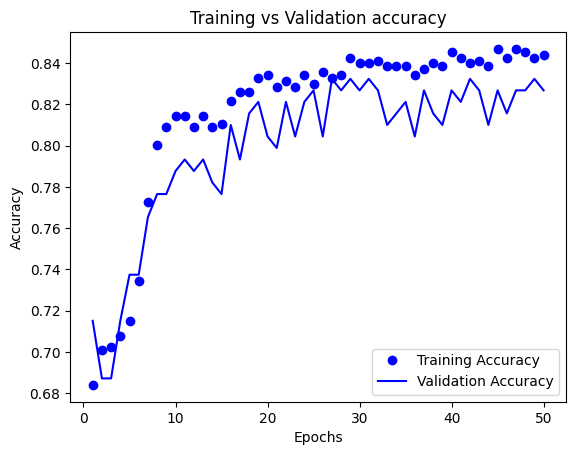

In [12]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label="Training Accuracy")
plt.plot(epochs, val_acc, "b", label="Validation Accuracy")
plt.title("Training vs Validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

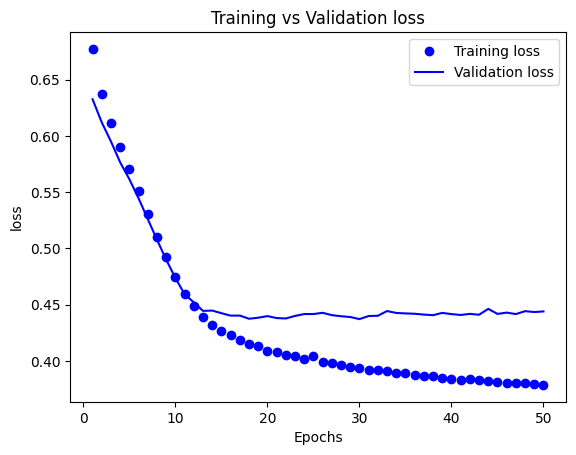

In [13]:
plt.plot(epochs, loss, 'bo', label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training vs Validation loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

# Building final model

In [14]:
finalModel = models.Sequential()
finalModel.add(layers.Dense(16,activation='relu', input_shape=(12,)))
finalModel.add(layers.Dense(8, activation='relu'))
finalModel.add(layers.Dense(1, activation='sigmoid'))

finalModel.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [15]:
history = finalModel.fit(t_data,
                       t_labels,
                       epochs=18,verbose=0
                   )

In [16]:
finalPredictions = finalModel.predict(test_dataset)

14/14 [==============================] - 0s 2ms/step


In [17]:
threshold = 0.5
finalPredictions[np.isnan(finalPredictions)] = 0
predicted_labels = (finalPredictions >= threshold).astype(int)

In [18]:
p_id = passengerIDs.tolist()
surv = predicted_labels.tolist()

surv = np.squeeze(surv, axis=1)
print(surv)

[0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 0 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0
 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 1 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0
 1 0 1 0 1 0 0 1 0 0 0]


In [19]:
output = pd.DataFrame({'PassengerId': p_id, 'Survived': surv})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
